In [46]:
# Source: https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Experiment 3

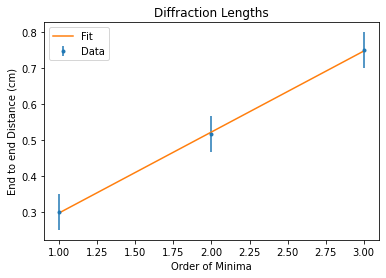

The slope = 0.225, with uncertainty 0.035
The intercept = 0.072, with uncertainty 0.076
Reduced chi^2 = 0.015


In [51]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y


# Slit Width 8 pts
m = np.array([1,2,3])
distance = np.array([np.mean([0.3, 0.3, 0.3, 0.3]), np.mean([0.5, 0.55, 0.5, 0.52]), np.mean([0.75, 0.75, 0.75, 0.75])])  # cm

# standard error
yerr = np.array([np.std([0.3, 0.3, 0.3, 0.3]), np.std([0.5, 0.55, 0.5, 0.52]), np.std([0.75, 0.75, 0.75, 0.75])]) / np.sqrt(3)
yerr = np.maximum(yerr, [0.05, 0.05, 0.05])  # measurement uncertainty
plt.errorbar(m, distance, yerr=yerr, fmt='.',label='Data')
plt.xlabel('Order of Minima')
plt.ylabel('End to end Distance (cm)')
plt.title('Diffraction Lengths')

a_fit,cov=curve_fit(linearFunc,m,distance,sigma=yerr,absolute_sigma=True)
inter = a_fit[0]
slope = a_fit[1]
yfit = inter + slope*m
plt.plot(m,yfit,label='Fit')
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])
plt.legend()
plt.show()

print(f'The slope = {np.round(slope, 3)}, with uncertainty {np.round(d_slope, 3)}')
print(f'The intercept = {np.round(inter, 3)}, with uncertainty {np.round(d_inter, 3)}')

chisqr = sum((distance-linearFunc(m,inter,slope))**2/yerr**2)
dof = len(distance) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {np.round(chisqr_red, 3)}')